### Mega Millions Jackpot Project
#### by Erika Harrell
#### A project exploring data downloaded from data.gov on the winning numbers from the Mega Millions Jackpot in the New York State Lottery drawn between May 2002 and May 2025.

In [40]:
#apply packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

In [41]:
#make cells show all output 
InteractiveShell.ast_node_interactivity = "all"

In [42]:
#read in data
df = pd.read_csv('nylottery.csv')

In [43]:
#1st 5 rows of data
df.head()

,Draw Date,Winning Numbers,Mega Ball,Multiplier
0,09/25/2020,20 36 37 48 67,16,2.0
1,09/29/2020,14 39 43 44 67,19,3.0
2,10/02/2020,09 38 47 49 68,25,2.0
3,10/06/2020,15 16 18 39 59,17,3.0
4,10/09/2020,05 11 25 27 64,13,2.0


In [44]:
#last 5 rows of data frame
df.tail()

,Draw Date,Winning Numbers,Mega Ball,Multiplier
2397,05/16/2025,02 22 42 62 66,14,NaN
2398,05/20/2025,18 30 33 55 64,11,NaN
2399,05/23/2025,07 18 40 55 68,18,NaN
2400,05/27/2025,06 28 34 48 62,9,NaN
2401,05/30/2025,02 28 37 38 58,13,NaN


In [45]:
#information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2402 entries, 0 to 2401
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Draw Date        2402 non-null   object 
 1   Winning Numbers  2402 non-null   object 
 2   Mega Ball        2402 non-null   int64  
 3   Multiplier       1483 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 75.2+ KB


In [46]:
#turn draw Date column into Date column with datetime format
df['Date']=pd.to_datetime(df['Draw Date'])

In [48]:
#creating separate variables for each winning number
df[['win_num_1', 'win_num_2', 'win_num_3','win_num_4', 'win_num_5']] = df['Winning Numbers'].str.split(expand=True)

In [49]:
#get the day of the week, month and year from the Date variable
df['Day of the week']=df['Date'].dt.day_name()
df['Month']=df['Date'].dt.month_name()
df['Year']=df['Date'].dt.year

In [50]:
#make the winning number columns numeric
df['win_num_1']=pd.to_numeric(df['win_num_1'])
df['win_num_2']=pd.to_numeric(df['win_num_2'])
df['win_num_3']=pd.to_numeric(df['win_num_3'])
df['win_num_4']=pd.to_numeric(df['win_num_4'])
df['win_num_5']=pd.to_numeric(df['win_num_5'])

In [51]:
#check 1st five rows of dataframe
df.head()

,Draw Date,Winning Numbers,Mega Ball,Multiplier,Date,win_num_1,win_num_2,win_num_3,win_num_4,win_num_5,Day of the week,Month,Year
0,09/25/2020,20 36 37 48 67,16,2.0,2020-09-25,20,36,37,48,67,Friday,September,2020
1,09/29/2020,14 39 43 44 67,19,3.0,2020-09-29,14,39,43,44,67,Tuesday,September,2020
2,10/02/2020,09 38 47 49 68,25,2.0,2020-10-02,9,38,47,49,68,Friday,October,2020
3,10/06/2020,15 16 18 39 59,17,3.0,2020-10-06,15,16,18,39,59,Tuesday,October,2020
4,10/09/2020,05 11 25 27 64,13,2.0,2020-10-09,5,11,25,27,64,Friday,October,2020


In [52]:
#check last 5 rows of dataframe
df.tail()

,Draw Date,Winning Numbers,Mega Ball,Multiplier,Date,win_num_1,win_num_2,win_num_3,win_num_4,win_num_5,Day of the week,Month,Year
2397,05/16/2025,02 22 42 62 66,14,NaN,2025-05-16,2,22,42,62,66,Friday,May,2025
2398,05/20/2025,18 30 33 55 64,11,NaN,2025-05-20,18,30,33,55,64,Tuesday,May,2025
2399,05/23/2025,07 18 40 55 68,18,NaN,2025-05-23,7,18,40,55,68,Friday,May,2025
2400,05/27/2025,06 28 34 48 62,9,NaN,2025-05-27,6,28,34,48,62,Tuesday,May,2025
2401,05/30/2025,02 28 37 38 58,13,NaN,2025-05-30,2,28,37,38,58,Friday,May,2025


In [53]:
#put dataframe in order by date
df=df.sort_values(by='Date', ignore_index=True)
#look at 1st 5 rows
df.head()

,Draw Date,Winning Numbers,Mega Ball,Multiplier,Date,win_num_1,win_num_2,win_num_3,win_num_4,win_num_5,Day of the week,Month,Year
0,05/17/2002,15 18 25 33 47,30,NaN,2002-05-17,15,18,25,33,47,Friday,May,2002
1,05/21/2002,04 28 39 41 44,9,NaN,2002-05-21,4,28,39,41,44,Tuesday,May,2002
2,05/24/2002,02 04 32 44 52,36,NaN,2002-05-24,2,4,32,44,52,Friday,May,2002
3,05/28/2002,06 21 22 29 32,24,NaN,2002-05-28,6,21,22,29,32,Tuesday,May,2002
4,05/31/2002,12 28 45 46 52,47,NaN,2002-05-31,12,28,45,46,52,Friday,May,2002


In [54]:
#look at last 5 rows
df.tail()

,Draw Date,Winning Numbers,Mega Ball,Multiplier,Date,win_num_1,win_num_2,win_num_3,win_num_4,win_num_5,Day of the week,Month,Year
2397,05/16/2025,02 22 42 62 66,14,NaN,2025-05-16,2,22,42,62,66,Friday,May,2025
2398,05/20/2025,18 30 33 55 64,11,NaN,2025-05-20,18,30,33,55,64,Tuesday,May,2025
2399,05/23/2025,07 18 40 55 68,18,NaN,2025-05-23,7,18,40,55,68,Friday,May,2025
2400,05/27/2025,06 28 34 48 62,9,NaN,2025-05-27,6,28,34,48,62,Tuesday,May,2025
2401,05/30/2025,02 28 37 38 58,13,NaN,2025-05-30,2,28,37,38,58,Friday,May,2025


In [55]:
#look at information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2402 entries, 0 to 2401
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Draw Date        2402 non-null   object        
 1   Winning Numbers  2402 non-null   object        
 2   Mega Ball        2402 non-null   int64         
 3   Multiplier       1483 non-null   float64       
 4   Date             2402 non-null   datetime64[ns]
 5   win_num_1        2402 non-null   int64         
 6   win_num_2        2402 non-null   int64         
 7   win_num_3        2402 non-null   int64         
 8   win_num_4        2402 non-null   int64         
 9   win_num_5        2402 non-null   int64         
 10  Day of the week  2402 non-null   object        
 11  Month            2402 non-null   object        
 12  Year             2402 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(6), object(4)
memory usage: 234.7+ KB


In [56]:
#check for missing values
df.isnull().sum()

Draw Date            0
Winning Numbers      0
Mega Ball            0
Multiplier         919
Date                 0
win_num_1            0
win_num_2            0
win_num_3            0
win_num_4            0
win_num_5            0
Day of the week      0
Month                0
Year                 0
dtype: int64

In [57]:
#get the years covered in the dataset
df['Year'].unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       2024, 2025], dtype=int32)

In [58]:
#show number of entries per year
#create series out of Year frequencies
year_freqs=list(df['Year'].value_counts())
year_values=df['Year'].unique()
year_freqs
year_values
yr_series = pd.Series(year_freqs,index=year_values)
yr_series
yr_series.info()

[105,
 105,
 105,
 105,
 105,
 105,
 105,
 104,
 104,
 104,
 104,
 104,
 104,
 104,
 104,
 104,
 104,
 104,
 104,
 104,
 103,
 103,
 66,
 43]

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       2024, 2025], dtype=int32)

2002    105
2003    105
2004    105
2005    105
2006    105
2007    105
2008    105
2009    104
2010    104
2011    104
2012    104
2013    104
2014    104
2015    104
2016    104
2017    104
2018    104
2019    104
2020    104
2021    104
2022    103
2023    103
2024     66
2025     43
dtype: int64

<class 'pandas.core.series.Series'>
Index: 24 entries, 2002 to 2025
Series name: None
Non-Null Count  Dtype
--------------  -----
24 non-null     int64
dtypes: int64(1)
memory usage: 288.0 bytes


<Axes: >

Text(0.5, 1.0, 'Number of Observations for Each Year')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Number of Observations')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '2002'),
  Text(1, 0, '2003'),
  Text(2, 0, '2004'),
  Text(3, 0, '2005'),
  Text(4, 0, '2006'),
  Text(5, 0, '2007'),
  Text(6, 0, '2008'),
  Text(7, 0, '2009'),
  Text(8, 0, '2010'),
  Text(9, 0, '2011'),
  Text(10, 0, '2012'),
  Text(11, 0, '2013'),
  Text(12, 0, '2014'),
  Text(13, 0, '2015'),
  Text(14, 0, '2016'),
  Text(15, 0, '2017'),
  Text(16, 0, '2018'),
  Text(17, 0, '2019'),
  Text(18, 0, '2020'),
  Text(19, 0, '2021'),
  Text(20, 0, '2022'),
  Text(21, 0, '2023'),
  Text(22, 0, '2024'),
  Text(23, 0, '2025')])

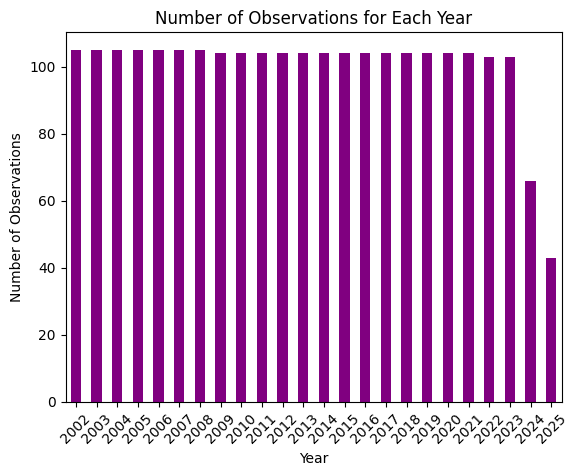

In [59]:
#create the bar chart
yr_series.plot(kind='bar', color='purple')

# Add title and labels
plt.title('Number of Observations for Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Observations')

#rotate labels on x axis 45 degrees so that they can be seen
plt.xticks(rotation=45)

# Display the chart
plt.show()

In [60]:
#get number of rows by day of the week
df['Day of the week'].value_counts()

Day of the week
Friday     1201
Tuesday    1201
Name: count, dtype: int64

In [62]:
#get mode of each winning number
print('The most frequent 1st winning number is', statistics.mode(df['win_num_1']), '.')
print('The most frequent 2nd winning number is', statistics.mode(df['win_num_2']), '.')
print('The most frequent 3rd winning number is', statistics.mode(df['win_num_3']), '.')
print('The most frequent 4th winning number is', statistics.mode(df['win_num_4']), '.')
print('The most frequent 5th winning number is', statistics.mode(df['win_num_5']), '.')

The most frequent 1st winning number is 2 .
The most frequent 2nd winning number is 17 .
The most frequent 3rd winning number is 31 .
The most frequent 4th winning number is 46 .
The most frequent 5th winning number is 52 .


In [63]:
#get the median for each winning number
print('The median of the 1st winning numbers is', round(statistics.median(df['win_num_1'])), '.')
print('The median of the 2nd winning numbers is', round(statistics.median(df['win_num_2'])), '.')
print('The median of the 3rd winning numbers is', round(statistics.median(df['win_num_3'])), '.')
print('The median of the 4th winning numbers is', round(statistics.median(df['win_num_4'])), '.')
print('The median of the 5th winning numbers is', round(statistics.median(df['win_num_5'])), '.')

The median of the 1st winning numbers is 8 .
The median of the 2nd winning numbers is 20 .
The median of the 3rd winning numbers is 31 .
The median of the 4th winning numbers is 42 .
The median of the 5th winning numbers is 53 .


In [64]:
#get the mean of each winning number
print('The mean of the 1st winning numbers is', round(np.mean(df['win_num_1'])), '.')
print('The mean of the 2nd winning numbers is', round(np.mean(df['win_num_2'])), '.')
print('The mean of the 3rd winning numbers is', round(np.mean(df['win_num_3'])), '.')
print('The mean of the 4th winning numbers is', round(np.mean(df['win_num_4'])), '.')
print('The mean of the 5th winning numbers is', round(np.mean(df['win_num_5'])), '.')

The mean of the 1st winning numbers is 10 .
The mean of the 2nd winning numbers is 21 .
The mean of the 3rd winning numbers is 32 .
The mean of the 4th winning numbers is 42 .
The mean of the 5th winning numbers is 53 .


In [65]:
#get the lowest and highest integer for each winning number
print("The lowest first winning number is", round(min(df['win_num_1'])), "and the highest first winning number is", round(max(df['win_num_1'])), ".")
print("The lowest second winning number is", round(min(df['win_num_2'])), "and the highest second winning number is", round(max(df['win_num_2'])), ".")
print("The lowest third winning number is", round(min(df['win_num_3'])), "and the highest third winning number is", round(max(df['win_num_3'])), ".")
print("The lowest fourth winning number is", round(min(df['win_num_4'])), "and the highest fourth winning number is", round(max(df['win_num_4'])), ".")
print("The lowest fifth winning number is", round(min(df['win_num_5'])), "and the highest fifth winning number is", round(max(df['win_num_5'])), ".")

The lowest first winning number is 1 and the highest first winning number is 56 .
The lowest second winning number is 2 and the highest second winning number is 66 .
The lowest third winning number is 3 and the highest third winning number is 68 .
The lowest fourth winning number is 5 and the highest fourth winning number is 74 .
The lowest fifth winning number is 14 and the highest fifth winning number is 75 .


In [67]:
#get the mean, median, mode, minimum and maximum of the Mega Ball
print("The mean of the Mega Ball is", round(np.mean(df['Mega Ball'])), ".")
print("The median of the Mega Ball is", round(statistics.median(df['Mega Ball'])), ".")
print("The mode of the Mega Ball is", round(statistics.mode(df['Mega Ball'])), ".")
print("The minimum of the Mega Ball is", round(min(df['Mega Ball'])), ".")
print("The maximum of the Mega Ball is", round(max(df['Mega Ball'])), ".")

The mean of the Mega Ball is 18 .
The median of the Mega Ball is 15 .
The mode of the Mega Ball is 9 .
The minimum of the Mega Ball is 1 .
The maximum of the Mega Ball is 52 .


<Axes: >

Text(0.5, 0, 'Value')

Text(0.5, 1.0, 'Whisker and Boxplots of the Distributions of Each Wiinning Number')

([<matplotlib.axis.YTick at 0x2a7cf482ad0>,
 [Text(0, 1, '5th number'),
  Text(0, 2, '4th number'),
  Text(0, 3, '3rd number'),
  Text(0, 4, '2nd number'),
  Text(0, 5, '1st number')])

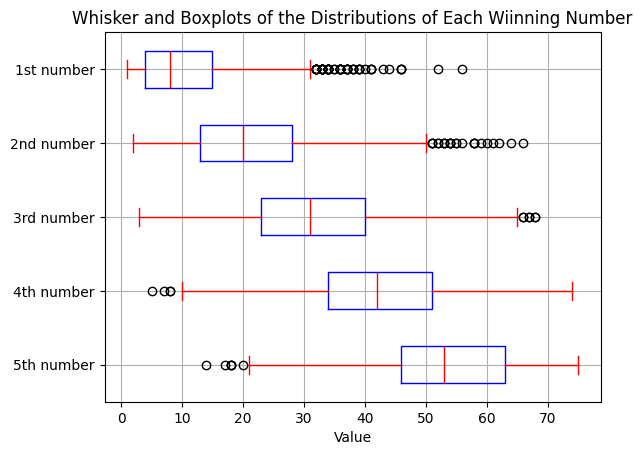

In [68]:
#boxplots for each winning number showing distribution
labels=['5th number','4th number','3rd number','2nd number','1st number']
df.boxplot(column=['win_num_5','win_num_4','win_num_3','win_num_2','win_num_1'],
           boxprops=dict(color='blue'), whiskerprops=dict(color='red'),capprops=dict(color='red'),medianprops=dict(color='red'),
           vert=False)
plt.xlabel('Value')
plt.title("Whisker and Boxplots of the Distributions of Each Wiinning Number")
plt.yticks(range(1,len(labels)+1),labels)
plt.show()

In [69]:
#all the values of the Multiplier variable
df['Multiplier'].unique()

array([nan,  4.,  2.,  3.,  5.])

In [123]:
#ceate a series with multiplier column
#look at frequencies of values in Multiplier column
df['Multiplier'].value_counts()
#make list of frequencies
mylist=list(df['Multiplier'].value_counts())
#get number of missing values
sum((df['Multiplier']).isna())
#append missing numbers onto list
mylist.append(sum((df['Multiplier']).isna()))
#look at list
print(mylist)


Multiplier
3.0    500
4.0    409
2.0    376
5.0    198
Name: count, dtype: int64

919

[500, 409, 376, 198, 919]


In [127]:
#rearrange list so that the value for 2 (376) is first
#remove element from list
element=mylist.pop(2)
#add element to mylist
mylist.insert(0,element)
#look at list
#print(mylist)
#create list for index
myindex=['2','3','4','5', 'Missing']
#create sereis
myseries=pd.Series(mylist,index=myindex)
#look atseries
myseries

2          500
3          409
4          376
5          198
Missing    919
dtype: int64

<Axes: >

Text(0.5, 1.0, 'Number of Observations for Each Multiplier')

Text(0.5, 0, 'Multiplier')

Text(0, 0.5, 'Number of Observations')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, 'Missing')])

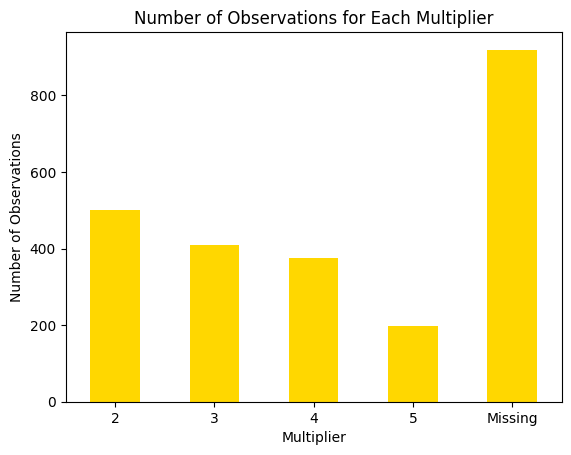

In [128]:
#Create the bar chart
myseries.plot(kind='bar', color='gold')

#Add title and labels
plt.title('Number of Observations for Each Multiplier')
plt.xlabel('Multiplier')
plt.ylabel('Number of Observations')

#rotate x axis labels so that they are readable
plt.xticks(rotation=0)

#Display the chart
plt.show()

array([[<Axes: title={'center': 'win_num_1'}>]], dtype=object)

Text(0.5, 0, '1st winning number')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Histogram of 1st winning number')

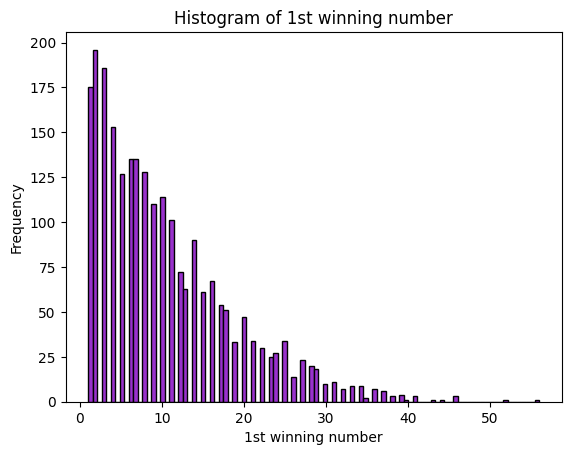

In [129]:
#histogram of 1st winning number
df.hist(column='win_num_1', bins=100, edgecolor='black', color='darkorchid', grid=False)
plt.xlabel('1st winning number')
plt.ylabel('Frequency')
plt.title('Histogram of 1st winning number')
plt.show()

array([[<Axes: title={'center': 'win_num_2'}>]], dtype=object)

Text(0.5, 0, '2nd winning number')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Histogram of 2nd winning number')

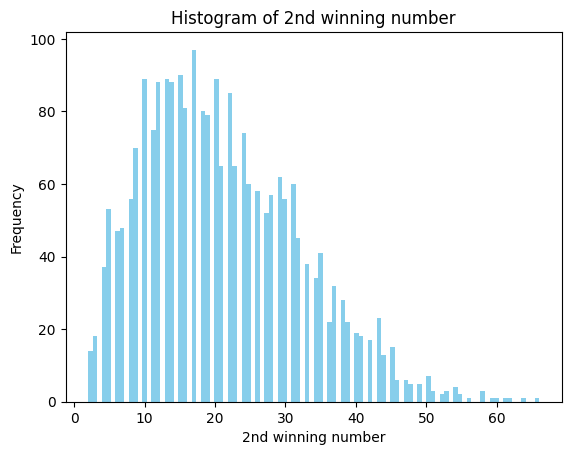

In [130]:
#histogram of 2nd winning number
df.hist(column='win_num_2', bins=100, color='skyblue', grid=False)
plt.xlabel('2nd winning number')
plt.ylabel('Frequency')
plt.title('Histogram of 2nd winning number')
plt.show()

array([[<Axes: title={'center': 'win_num_3'}>]], dtype=object)

Text(0.5, 0, '3rd winning number')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Histogram of 3rd winning number')

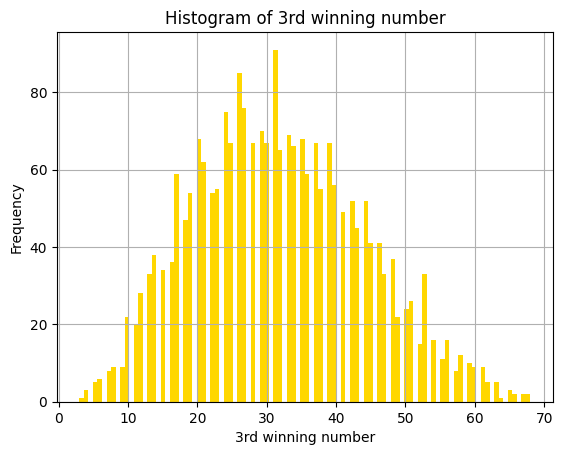

In [131]:
#histogram of 3rd winning number
df.hist(column='win_num_3', bins=100, color='gold')
plt.xlabel('3rd winning number')
plt.ylabel('Frequency')
plt.title('Histogram of 3rd winning number')
plt.show()

array([[<Axes: title={'center': 'win_num_4'}>]], dtype=object)

Text(0.5, 0, '4th winning number')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Histogram of 4th winning number')

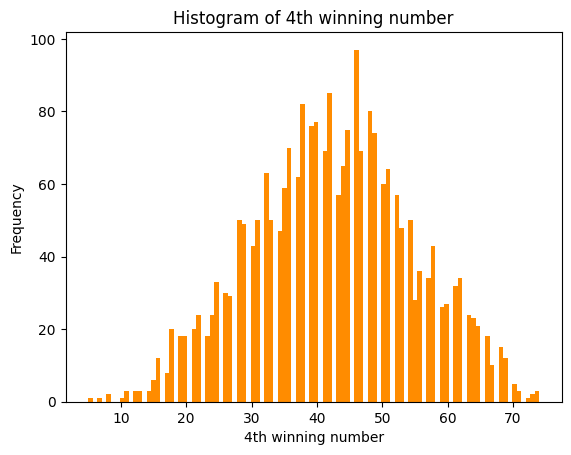

In [132]:
#histogram of 4th winning number
df.hist(column='win_num_4', bins=100, color='darkorange',grid=False)
plt.xlabel('4th winning number')
plt.ylabel('Frequency')
plt.title('Histogram of 4th winning number')
plt.show()

array([[<Axes: title={'center': 'win_num_5'}>]], dtype=object)

Text(0.5, 0, '5th winning number')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Histogram of 5th winning number')

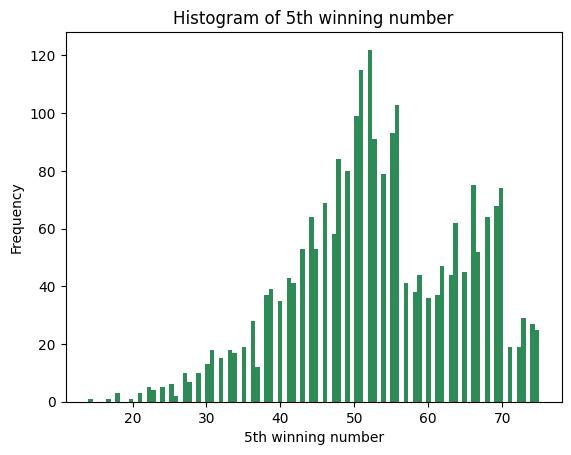

In [133]:
#histogram of 5th winning number
df.hist(column='win_num_5', bins=100, color='seagreen',grid=False)
plt.xlabel('5th winning number')
plt.ylabel('Frequency')
plt.title('Histogram of 5th winning number')
plt.show()

Text(0.5, 0, '1st Winning Number')

Text(0.5, 0.5, '2nd Winning Number')

Text(0.5, 0, '3rd Winning Number')

Text(0.5, 0.92, '3D Scatter Plot with the 1st 3 Winning Numbers')

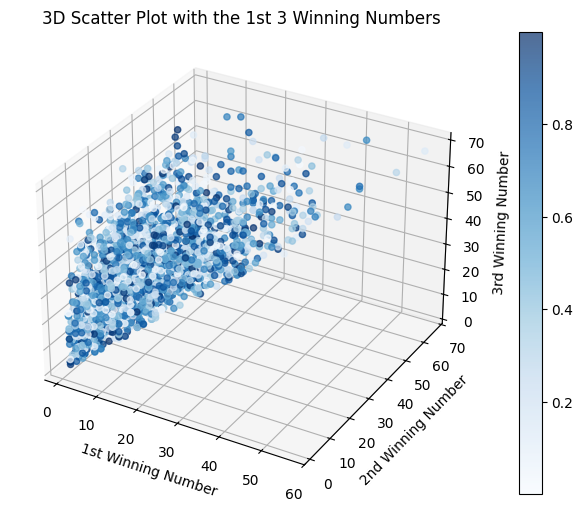

In [135]:
#create 3d plot with first 3 winning numbers
#set x,y,and z coordinates
x = df['win_num_1'].to_numpy()
y = df['win_num_2'].to_numpy()
z = df['win_num_3'].to_numpy()

#set number of colors to be the nnumber of rows in dataframe
colors = np.random.rand(2402)

#set the figures size and create axes 3d object
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

#create the scatter plot within ax
scatter = ax.scatter(x, y, z, c=colors, cmap='Blues', alpha=0.7)

#add labels and title
ax.set_xlabel('1st Winning Number')
ax.set_ylabel('2nd Winning Number')
ax.set_zlabel('3rd Winning Number')
ax.set_title('3D Scatter Plot with the 1st 3 Winning Numbers')

#add a colorbar
fig.colorbar(scatter)

#show the plot
plt.show()

Text(0.5, 0, '3rd Winning Number')

Text(0.5, 0.5, '4th Winning Number')

Text(0.5, 0, '5th Winning Number')

Text(0.5, 0.92, '3D Scatter Plot with the Last 3 Winning Numbers')

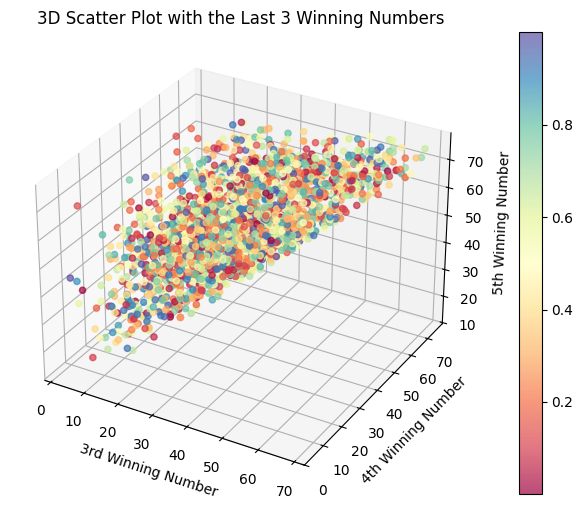

In [136]:
# create 3d plot with last 3 winning numbers
x = df['win_num_3'].to_numpy()
y = df['win_num_4'].to_numpy()
z = df['win_num_5'].to_numpy()
colors = np.random.rand(2402)
# Create the figure and axes object
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot
scatter = ax.scatter(x, y, z, c=colors, cmap='Spectral', alpha=0.7)

# Add labels and title
ax.set_xlabel('3rd Winning Number')
ax.set_ylabel('4th Winning Number')
ax.set_zlabel('5th Winning Number')
ax.set_title('3D Scatter Plot with the Last 3 Winning Numbers')

# Add a colorbar
fig.colorbar(scatter)

# Show the plot
plt.show()

Text(0.5, 0, '1st Winning Number')

Text(0.5, 0.5, '3rd Winning Number')

Text(0.5, 0, '5th Winning Number')

Text(0.5, 0.92, '3D Scatter Plot with the Odd Winning Numbers')

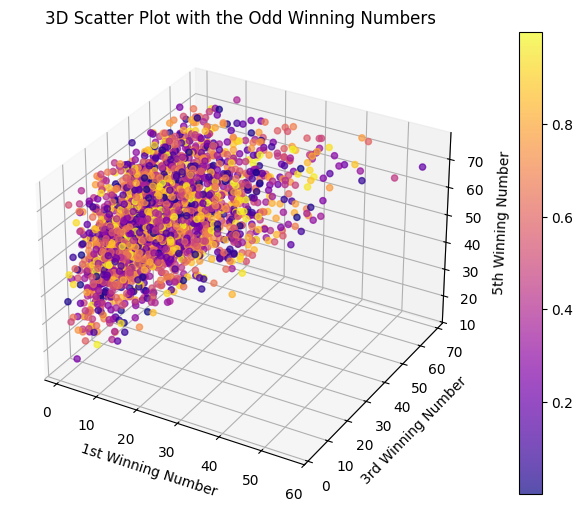

In [138]:
# create 3d plot with the odd winning numbers
x = df['win_num_1'].to_numpy()
y = df['win_num_3'].to_numpy()
z = df['win_num_5'].to_numpy()
colors = np.random.rand(2402)
# Create the figure and axes object
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot
scatter = ax.scatter(x, y, z, c=colors, cmap='plasma', alpha=0.7)

# Add labels and title
ax.set_xlabel('1st Winning Number')
ax.set_ylabel('3rd Winning Number')
ax.set_zlabel('5th Winning Number')
ax.set_title('3D Scatter Plot with the Odd Winning Numbers')

# Add a colorbar
fig.colorbar(scatter)

# Show the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, '2nd winning number')

Text(0, 0.5, '4th winning number')

Text(0.5, 1.0, 'Scatter Plot of Even Winning Numbers')

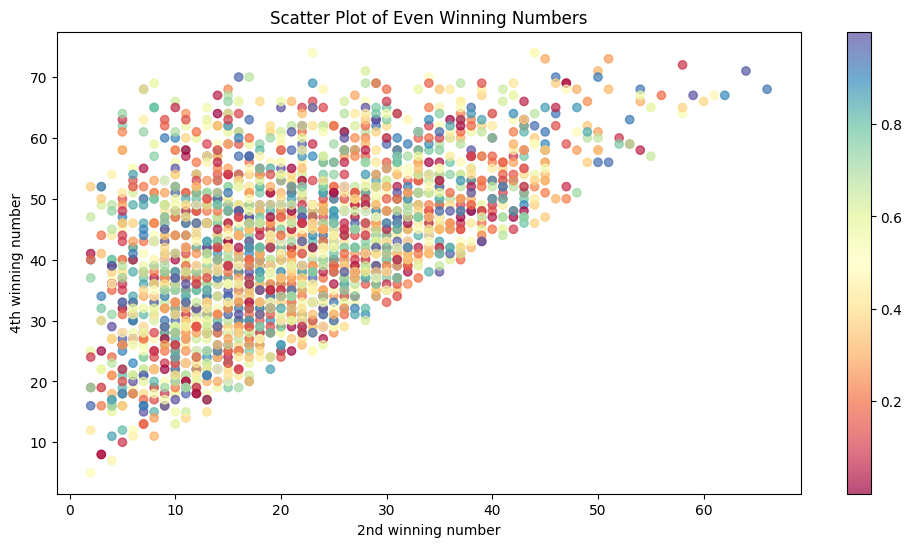

In [139]:
#scatter plot of the even winning numbers
#set figure size
plt.figure(figsize=(12,6))

#set x and y variables
x=df['win_num_2']
y=df['win_num_4']

#set colors
colors = np.random.rand(2402)

#create scatter plot
scatter=plt.scatter(x,y,c=colors, cmap='Spectral', alpha=0.7)

#create colorbar
colorbar = plt.colorbar(scatter)

#set labels and title
plt.xlabel('2nd winning number')
plt.ylabel('4th winning number')
plt.title('Scatter Plot of Even Winning Numbers')
# Show the plot
plt.show()